In [2]:
# Aplica el método de componentes principales en el conjunto de datos mb.csv y escoge las d primeras componentes principales:
# a) Que garanticen un 95% de la varianza original de los datos.
# b) Con el método del codo.
# c) Con el criterio de Kaiser.

In [9]:
# Comenzamos cargando el dataset en un dataframe

import pandas as pd

mb = pd.read_csv('Ejercicios_resueltos_Tema9_mb.csv')
print(mb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   alanine                1175 non-null   float64
 1   creatin.phosphate      1175 non-null   float64
 2   creatine               1175 non-null   float64
 3   cysteine               1175 non-null   float64
 4   glutamine              1175 non-null   float64
 5   n.acetylglutamine      1175 non-null   float64
 6   proline                1175 non-null   float64
 7   tryptophan             1175 non-null   float64
 8   tyrosine               1175 non-null   float64
 9   isoleucine             1175 non-null   float64
 10  leucine                1175 non-null   float64
 11  valine                 1175 non-null   float64
 12  fa.ch2ch2co            1175 non-null   float64
 13  fa.ch2ch3              1175 non-null   float64
 14  fa.ch2n                1175 non-null   float64
 15  fa.c

In [11]:
# Apartado a)

from sklearn.decomposition import PCA

# Se aplica el método PCA sin indicar ningún argumento
pca = PCA()

# Proyección del conjunto de datos mb en el subespacio formado por la componentes principales (PC)
mb_PC = pca.fit_transform(mb)

mb_PC.shape

(1175, 54)

In [17]:
# Como se han escogido todas las componentes principales, se sigue trabajando en el mismo espacio de datos, en el que hay 54 variables.
# A continuación, escogemos las componentes principales que garanticen el 95% de la varianza original del conjunto de datos. Para ello se
# emplea el atributo 'explained_variance_ratio_', que indica el porcentaje de la varianza original aportado por cada componente principal.

print(pca.explained_variance_ratio_)

[6.54113751e-01 1.18315153e-01 8.57161065e-02 4.49026558e-02
 2.40614153e-02 1.57406515e-02 1.19984404e-02 1.07629315e-02
 7.25341646e-03 5.09067583e-03 4.14285028e-03 2.86864343e-03
 2.45528447e-03 1.87532558e-03 1.66420326e-03 1.51093331e-03
 1.29703833e-03 1.15389535e-03 8.64402585e-04 8.08919830e-04
 5.22737224e-04 4.35979353e-04 3.79831616e-04 3.39089074e-04
 2.91621961e-04 2.25647457e-04 1.92138875e-04 1.40931503e-04
 1.20856631e-04 1.16412240e-04 9.12743328e-05 7.54115534e-05
 6.91451154e-05 5.60639983e-05 4.88777554e-05 3.89308594e-05
 3.46320905e-05 3.20654047e-05 2.95220832e-05 2.72828096e-05
 2.34086263e-05 1.87246371e-05 1.62239037e-05 1.52212230e-05
 1.21886973e-05 1.12322939e-05 9.69063850e-06 7.50877781e-06
 6.46432045e-06 4.32411037e-06 3.67087520e-06 2.56866886e-06
 2.47900852e-06 1.14812962e-06]


In [15]:
# Se observa, como debe ser, que la primera componente principal es la que más varianza original explica, después la segunda y así 
# sucesivamente. La suma de todos los porcentajes es 1.
sum(pca.explained_variance_ratio_)

0.9999999999999998

In [20]:
# Para ver cuántas componentes principales son necesarias para capturar el 95% de la varianza original se usa el método cumsum, que 
# proporciona el tanto por uno acumulado.
print(pca.explained_variance_ratio_.cumsum())

[0.65411375 0.7724289  0.85814501 0.90304767 0.92710908 0.94284973
 0.95484817 0.96561111 0.97286452 0.9779552  0.98209805 0.98496669
 0.98742198 0.9892973  0.9909615  0.99247244 0.99376948 0.99492337
 0.99578777 0.99659669 0.99711943 0.99755541 0.99793524 0.99827433
 0.99856595 0.9987916  0.99898374 0.99912467 0.99924553 0.99936194
 0.99945321 0.99952863 0.99959777 0.99965384 0.99970271 0.99974164
 0.99977628 0.99980834 0.99983786 0.99986515 0.99988855 0.99990728
 0.9999235  0.99993872 0.99995091 0.99996215 0.99997184 0.99997934
 0.99998581 0.99999013 0.9999938  0.99999637 0.99999885 1.        ]


In [22]:
# Se observa que a partir de la séptima componente principal se supera el 0.95 (95%) de la varianza original.
# Se crea un nuevo objeto de la clase PCA especificando el número de componentes principales en 7.
pca_7 = PCA(n_components=7)
mb_PC_7 = pca_7.fit_transform(mb)
mb_PC_7.shape

(1175, 7)

In [24]:
# Todo el procedimiento anterior se puede evitar indicando en la creación del objeto PCA el porcentaje de varianza original deseado.
pca_7_bis = PCA(n_components=0.95)
mb_PC_7_bis = pca_7_bis.fit_transform(mb)
mb_PC_7_bis.shape

(1175, 7)

In [29]:
# Por último, convertimos el conjunto de datos en el nuevo espacio de 7 dimensiones en un dataframe.
columns = ['PC'+str(i) for i in range(1,8)]
mb_PC_7_df = pd.DataFrame(data=mb_PC_7, columns=columns)
mb_PC_7_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.306603,0.034829,-0.229271,-0.451673,0.280762,0.211505,-0.170962
1,0.081369,1.001265,0.069101,-0.164533,0.321772,0.220158,0.046287
2,4.451763,2.034792,1.154947,0.372276,-0.755619,-0.136551,0.365417
3,2.773560,-5.209073,0.228254,-0.382472,-0.208599,0.044349,-1.104811
4,0.399323,0.036426,-0.743607,1.228068,0.175580,-0.250505,-0.358564
...,...,...,...,...,...,...,...
1170,1.697547,0.884256,0.716098,0.355019,-0.064594,0.190431,-0.013601
1171,-0.859846,1.241368,1.753723,-1.377576,-0.011713,0.060394,0.315103
1172,-1.043888,0.235480,-0.045429,0.125023,0.756699,-0.062044,-0.091246
1173,-2.732371,-0.550809,0.439849,0.804923,-1.067859,-0.830011,-0.061474


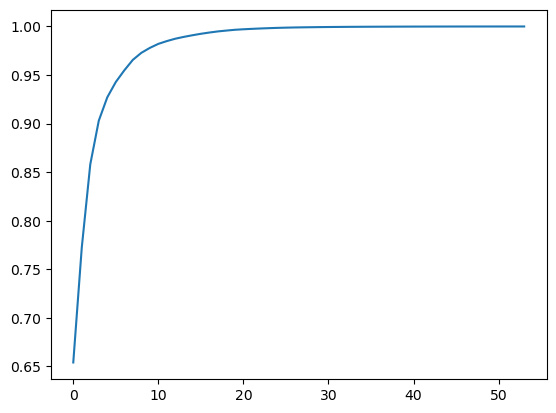

In [31]:
# Apartado b)
import matplotlib.pyplot as plt

# Se representa la proporción de varianza acumulada
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.show()

In [33]:
# Gráficamente se observa que a partir de 10 componentes principales a penas aumenta el porcentaje de varianza original.

pca_10 = PCA(n_components=10)
mb_PC_10 = pca_10.fit_transform(mb)

# Dataframe de la proyección del conjunto de datos
columns = ['PC'+str(i) for i in range(1,11)]
mb_PC_10_df = pd.DataFrame(data=mb_PC_10, columns=columns)
mb_PC_10_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.306603,0.034829,-0.229271,-0.451673,0.280762,0.211505,-0.170962,-0.076527,-0.342418,0.326579
1,0.081369,1.001265,0.069101,-0.164533,0.321772,0.220158,0.046287,0.023825,0.301294,0.193152
2,4.451763,2.034792,1.154947,0.372276,-0.755619,-0.136551,0.365417,-0.767980,-0.102947,-0.160413
3,2.773560,-5.209073,0.228254,-0.382472,-0.208599,0.044349,-1.104811,-1.025533,0.169926,-0.091083
4,0.399323,0.036426,-0.743607,1.228068,0.175580,-0.250505,-0.358564,-0.159043,-0.257653,-0.204145
...,...,...,...,...,...,...,...,...,...,...
1170,1.697547,0.884256,0.716098,0.355019,-0.064594,0.190431,-0.013601,0.043250,-0.147054,0.281549
1171,-0.859846,1.241368,1.753723,-1.377576,-0.011713,0.060394,0.315103,-0.155732,-0.048135,-0.102848
1172,-1.043888,0.235480,-0.045429,0.125023,0.756699,-0.062044,-0.091246,0.207473,-0.009620,-0.020013
1173,-2.732371,-0.550809,0.439849,0.804923,-1.067859,-0.830011,-0.061474,0.451311,0.036789,0.039959


In [37]:
# Apartado c)
# El criterio de Kaiser indica que se escogen aquellas componentes principales con una varianza superior a 1%
print(pca.explained_variance_)

[5.84872221e+00 1.05790845e+00 7.66425862e-01 4.01494632e-01
 2.15143824e-01 1.40744171e-01 1.07283396e-01 9.62361612e-02
 6.48560252e-02 4.55179986e-02 3.70430685e-02 2.56498178e-02
 2.19537913e-02 1.67681207e-02 1.48803821e-02 1.35099273e-02
 1.15973971e-02 1.03174920e-02 7.72900828e-03 7.23291227e-03
 4.67402620e-03 3.89828546e-03 3.39624355e-03 3.03194635e-03
 2.60752176e-03 2.01761435e-03 1.71799921e-03 1.26013130e-03
 1.08063293e-03 1.04089365e-03 8.16124437e-04 6.74288266e-04
 6.18257255e-04 5.01293164e-04 4.37037767e-04 3.48098143e-04
 3.09660937e-04 2.86711057e-04 2.63970086e-04 2.43947744e-04
 2.09306948e-04 1.67425315e-04 1.45065145e-04 1.36099730e-04
 1.08984568e-04 1.00432940e-04 8.66483123e-05 6.71393247e-05
 5.78003665e-05 3.86637955e-05 3.28229291e-05 2.29676116e-05
 2.21659187e-05 1.02659380e-05]


In [39]:
# Solo las dos primeras componentes principales cumplen el criterio de Kaiser.
pca_2 = PCA(n_components=2)
mb_PC_2 = pca_2.fit_transform(mb)
mb_PC_2_df = pd.DataFrame(data=mb_PC_2, columns=['PC1', 'PC2'])
mb_PC_2_df

,PC1,PC2
0,-1.306603,0.034829
1,0.081369,1.001265
2,4.451763,2.034792
3,2.773560,-5.209073
4,0.399323,0.036426
...,...,...
1170,1.697547,0.884256
1171,-0.859846,1.241368
1172,-1.043888,0.235480
1173,-2.732371,-0.550809
